In [1]:
movie1 = '/home/nkureev/Rheology/Movie1.tsv'
movie2 = '/home/nkureev/Rheology/Movie2.csv'
movie3 = '/home/nkureev/Rheology/Movie3.csv'

In [2]:
import pandas as pd

pd1 = pd.read_csv(movie1, sep='\t')
for i in range(len(pd1)):
    for j in range(len(pd1.iloc[i])):
        pd1.iloc[i][j] = int(''.join(pd1.iloc[i][j].split(',')))
        
pd1.head()

,Cell_1,Cell_2,Cell_3,Cell_4,Cell_5
0,5064,4936,4553,4124,1808
1,4648,5119,4969,4928,2065
2,4869,5911,5184,5679,2124
3,5992,6770,5627,5949,2283
4,6272,7567,6336,6554,2581


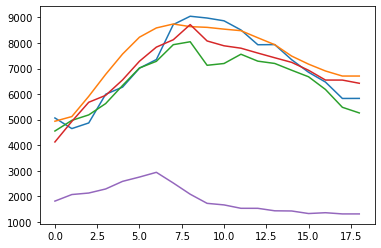

In [3]:
import matplotlib.pyplot as plt

for i in pd1:
    plt.plot(pd1[i])
    
plt.show()

In [4]:
n = 1
movie2_dict = {'Cell_1': []}
cell_name = 'Cell_' + str(n)
with open(movie2, 'r') as f:
    for lines in f:
        if not lines == '\n':
            if 'Area' not in lines: 
                movie2_dict[cell_name].append(int(''.join(lines.split(',')[1].split('.'))))
        else:
            n += 1
            cell_name = 'Cell_' + str(n)
            movie2_dict[cell_name] = []

pd2 = pd.DataFrame.from_dict(movie2_dict)
pd2 = pd2.drop(index=[0, 1])
pd2 = pd2.reset_index(drop=True)
pd2.head()

,Cell_1,Cell_2,Cell_3,Cell_4,Cell_5,Cell_6
0,6439,6527,6880,7233,7498,6969
1,6704,6704,6880,7410,7762,6969
2,7057,7057,7321,7586,7851,7145
3,7145,7321,7410,7851,8203,7233
4,7321,7410,7762,8027,8468,7410


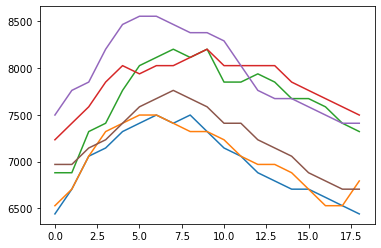

In [5]:
import matplotlib.pyplot as plt

for i in pd2:
    plt.plot(pd2[i])
    
plt.show()

In [6]:
pd3 = pd.read_csv(movie3, '\t')
del pd3['cell']
pd3.rename(columns={str(n): 'Cell_' + str(n) for n in range(1, len(pd3.columns) + 1)}, inplace = True)
for i in range(len(pd3)):
    for j in range(len(pd3.iloc[i])):
        r = float('.'.join(pd3.iloc[i][j].split(','))) / 2
        pd3.iloc[i][j] = (4 * 3.14 * r ** 3) // 3

pd3 = pd3.drop(index=[0])
pd3 = pd3.reset_index(drop=True)
pd3.head()

,Cell_1,Cell_2,Cell_3,Cell_4,Cell_5,Cell_6,Cell_7,Cell_8,Cell_9
0,5206,4600,4776,4479,5167,4945,4006,5231,4855
1,5451,5062,5536,4914,6572,5291,4217,4681,4681
2,5451,6572,5710,5084,7169,5118,5084,6218,5305
3,5885,6300,7134,5794,6936,5305,5594,5291,6150
4,7580,7421,6720,7421,7868,6632,6061,7134,6572


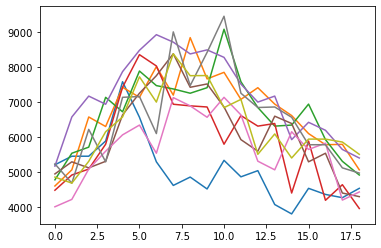

In [7]:
import matplotlib.pyplot as plt

for i in pd3:
    plt.plot(pd3[i])
    
plt.show()

In [8]:
df = pd.concat([pd1, pd2, pd3], axis=1)
df.columns =list(['Cell_' + str(n) for n in range(1, len(list(df)) + 1)])
df.astype(dtype=int)
df.head()

,Cell_1,Cell_2,Cell_3,Cell_4,Cell_5,Cell_6,Cell_7,Cell_8,Cell_9,Cell_10,Cell_11,Cell_12,Cell_13,Cell_14,Cell_15,Cell_16,Cell_17,Cell_18,Cell_19,Cell_20
0,5064,4936,4553,4124,1808,6439,6527,6880,7233,7498,6969,5206,4600,4776,4479,5167,4945,4006,5231,4855
1,4648,5119,4969,4928,2065,6704,6704,6880,7410,7762,6969,5451,5062,5536,4914,6572,5291,4217,4681,4681
2,4869,5911,5184,5679,2124,7057,7057,7321,7586,7851,7145,5451,6572,5710,5084,7169,5118,5084,6218,5305
3,5992,6770,5627,5949,2283,7145,7321,7410,7851,8203,7233,5885,6300,7134,5794,6936,5305,5594,5291,6150
4,6272,7567,6336,6554,2581,7321,7410,7762,8027,8468,7410,7580,7421,6720,7421,7868,6632,6061,7134,6572


In [9]:
initial_volumes = list(df.iloc[0])
highest_volumes = list([max(df[x]) for x in df.columns])
final_volumes = list(df.iloc[18])

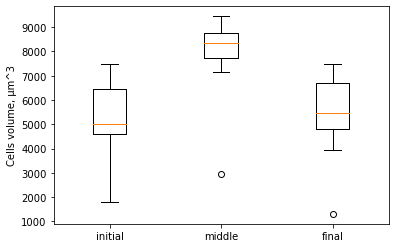

In [10]:
import matplotlib.pyplot as plt

plt.boxplot([initial_volumes, highest_volumes, final_volumes], labels=['initial', 'middle', 'final'])
plt.ylabel("Cells volume, μm^3")
plt.show()

In [11]:
from scipy import stats

stats.ttest_ind(initial_volumes, highest_volumes)

Ttest_indResult(statistic=-6.562244756152734, pvalue=9.67557058609106e-08)

In [12]:
stats.ttest_ind(initial_volumes, final_volumes)

Ttest_indResult(statistic=-0.6097355786992309, pvalue=0.5456659583184419)

In [13]:
stats.ttest_ind(final_volumes, highest_volumes)

Ttest_indResult(statistic=-5.633214589925072, pvalue=1.8134855881505475e-06)